# Data Exploration


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import feature_selection
from sklearn.linear_model import LinearRegression
import seaborn as sb

In [63]:
data = pd.read_csv('Data/parkinsons_data.csv',index_col=0)
data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [74]:
data.columns.value_counts().sum()

23

In [79]:
independent = data.drop('status', axis=1)
independent.columns.value_counts().sum()

Input = independent
Output = data.status

type(Output)

pandas.core.series.Series

<AxesSubplot:>

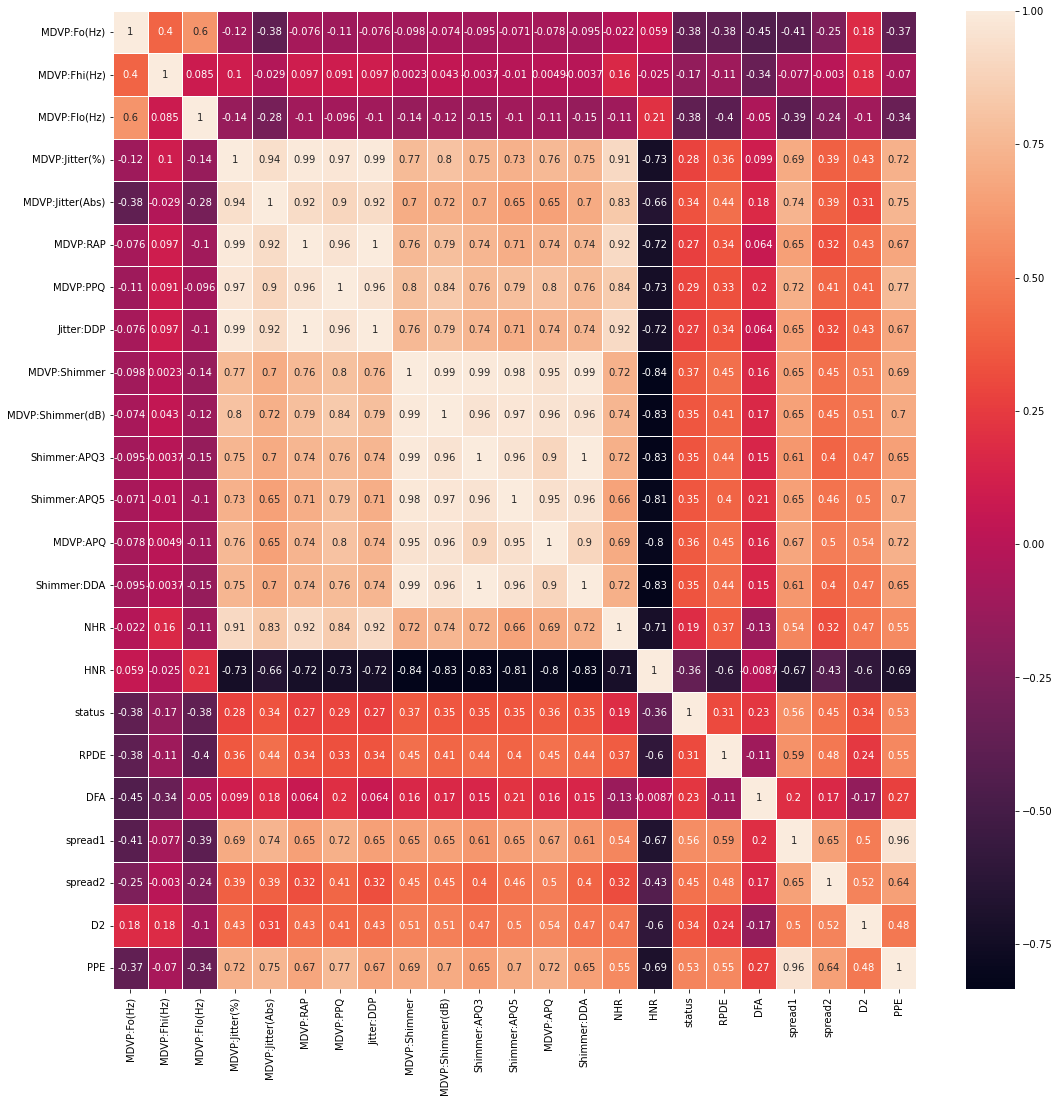

In [66]:
cor = data.corr()
fig, ax = plt.subplots(figsize=(18,18))         # Sample figsize in inches
sb.heatmap(cor, annot=True, linewidths=.8, ax=ax)

In [71]:
feature_selection.f_regression(Input, Output, center=True)
model = LinearRegression(fit_intercept=True)

selector = feature_selection.RFE(model, n_features_to_select=10, step=1)
selector = selector.fit(Input, Output)
selector.support_

array([False, False, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True, False, False, False, False,
       False, False, False,  True])

In [72]:
selector.ranking_

array([11, 13, 12,  1,  1,  1,  1,  1,  1,  3,  1,  1,  8,  1,  2, 10,  6,
        4,  7,  5,  9,  1])

In [73]:
data.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Input, Output, train_size = 0.7, shuffle=True, random_state=43)

In [110]:
X_train

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S20_5,100.960,110.019,95.628,0.00606,0.000060,0.00351,0.00348,0.01053,0.02427,0.216,...,0.01751,0.04114,0.01237,20.536,0.554610,0.787896,-5.022288,0.146948,2.428306,0.264666
phon_R01_S10_3,243.439,250.912,232.435,0.00210,0.000009,0.00109,0.00137,0.00327,0.01419,0.126,...,0.01033,0.02330,0.00454,25.368,0.438296,0.635285,-7.057869,0.091608,2.330716,0.091470
phon_R01_S18_6,136.358,176.595,65.750,0.00971,0.000070,0.00534,0.00478,0.01601,0.04978,0.483,...,0.03736,0.08247,0.03361,18.570,0.543299,0.733232,-5.207985,0.224852,2.642276,0.242981
phon_R01_S18_2,136.969,166.607,66.004,0.00923,0.000070,0.00507,0.00463,0.01520,0.03111,0.308,...,0.02603,0.04914,0.02659,19.979,0.498133,0.729067,-5.324574,0.205660,2.291558,0.226247
phon_R01_S44_5,148.462,161.078,141.998,0.00397,0.000030,0.00202,0.00235,0.00605,0.01831,0.163,...,0.01559,0.02849,0.00639,22.866,0.408598,0.768845,-5.704053,0.216204,2.679185,0.197710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
phon_R01_S16_5,116.879,131.897,108.153,0.00788,0.000070,0.00334,0.00493,0.01003,0.02645,0.265,...,0.02137,0.04183,0.00786,22.603,0.540049,0.813432,-4.476755,0.262633,1.827012,0.326197
phon_R01_S05_4,153.880,172.860,78.128,0.00480,0.000030,0.00232,0.00267,0.00696,0.04137,0.370,...,0.04525,0.06062,0.01849,19.493,0.629017,0.698951,-5.186960,0.237622,2.557536,0.259765
phon_R01_S13_2,122.964,130.049,114.676,0.00428,0.000030,0.00124,0.00155,0.00373,0.01681,0.154,...,0.01400,0.02789,0.00462,24.971,0.538688,0.754073,-6.482096,0.264967,2.054419,0.128872


In [111]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

oversampler = SMOTE(random_state=1)
X_train_smote, y_train_smote = oversampler.fit_resample(X_train, y_train)

In [112]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [113]:
print(model.score(X_train, y_train)*100)

100.0


In [114]:
print(model.score(X_test, y_test)*100)

91.52542372881356
